In [11]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from feature_selector import FeatureSelector

In [5]:
# Load data
data = pd.read_csv("../data/output.csv")
data.dropna(inplace=True)

In [6]:
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
#print(X.head(5))
#print(y.head(5))

In [7]:
#data.head(5)
print(f"Number of rows: {len(data.index)}.")

Number of rows: 155.


In [8]:
# print(*list(enumerate(X.columns.values)), sep="\n")
print(f"Number of features: {len(X.columns.values)}.")

Number of features: 107.


In [13]:
model = SVR(gamma='auto', C=1)
scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(scores.mean())
model = SVR(gamma='auto', C=0.6)
scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(scores.mean())
model = SVR(gamma='auto', C=1.4)
scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(scores.mean())

-0.9756583864644257
-0.97937554475127
-0.9778467143905594


In [12]:
np.std(y)

1.3638602122748615

In [10]:
from sklearn.dummy import DummyRegressor 
model = DummyRegressor(strategy="mean")
scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
scores.mean()

-1.0082154006243496

In [7]:
fs = FeatureSelector(data = X, labels = y)

In [8]:
fs.identify_single_unique()
#s.ops["single_unique"]

35 features with a single unique value.



In [9]:
fs.unique_stats

,nunique
period2_Contenido del curso el,1
period1_Módulo de curso creado,1
period1_Módulo de curso elimin,1
period1_Quiz report viewed,1
period1_Rol asignado,1
period1_Sección de curso actua,1
period1_Suscripción activada,1
period1_Usuario matriculado en,1
period1_Vista previa del inten,1
period1_Visualización de las C,1


13 features with a correlation magnitude greater than 0.95.



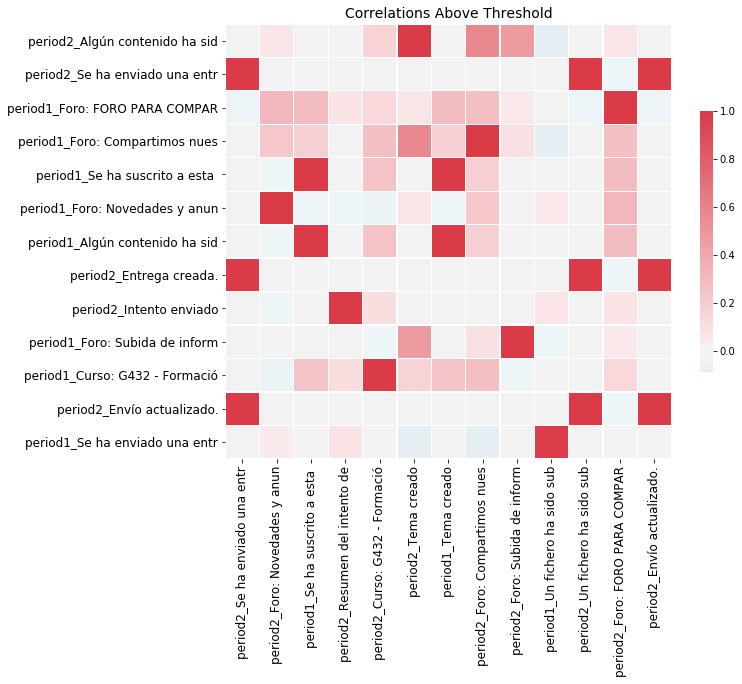

In [10]:
fs.identify_collinear(correlation_threshold=0.95)
fs.plot_collinear()

In [11]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = False)

Training Gradient Boosting Model


81 features with zero importance after one-hot encoding.



In [12]:
fs.identify_low_importance(cumulative_importance = 0.99)
low_importance_features = fs.ops['low_importance']
#low_importance_features

21 features required for cumulative importance of 0.99 after one hot encoding.
86 features do not contribute to cumulative importance of 0.99.



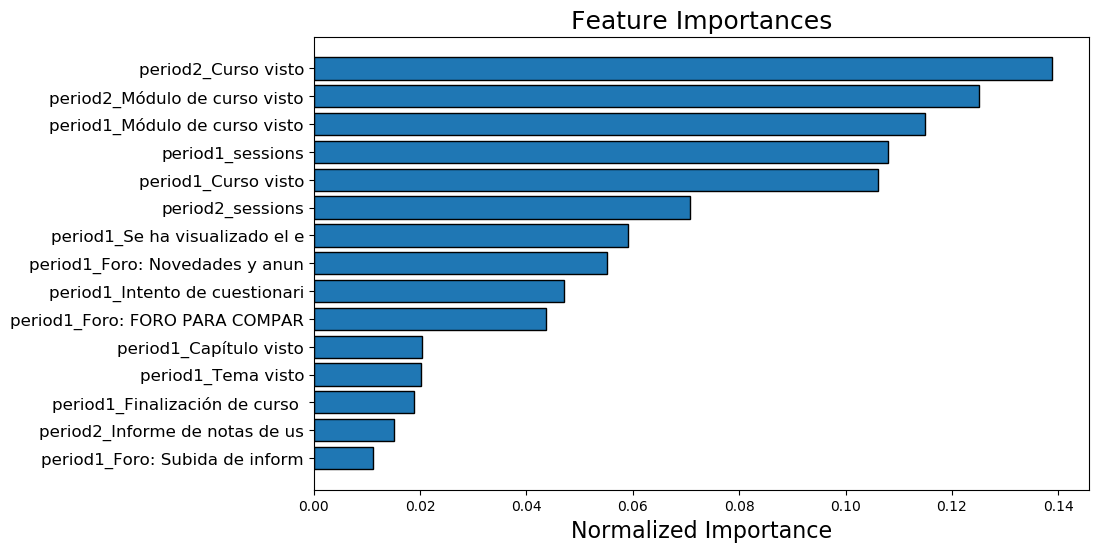

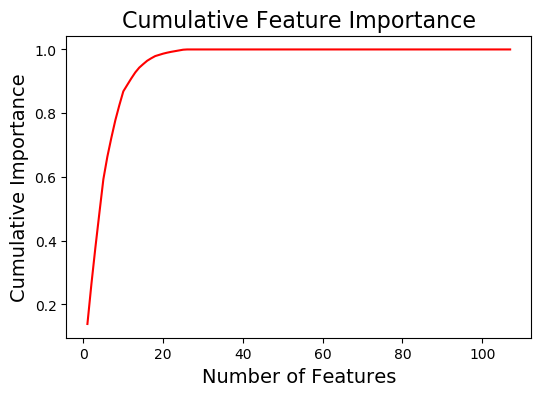

In [13]:
fs.plot_feature_importances()

In [14]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,period2_Curso visto,687.0,0.138760,0.138760
1,period2_Módulo de curso visto,619.0,0.125025,0.263785
2,period1_Módulo de curso visto,569.0,0.114926,0.378711
3,period1_sessions,535.0,0.108059,0.486770
4,period1_Curso visto,525.0,0.106039,0.592810
5,period2_sessions,350.0,0.070693,0.663502
6,period1_Se ha visualizado el e,293.0,0.059180,0.722682
7,period1_Foro: Novedades y anun,273.0,0.055140,0.777823
8,period1_Intento de cuestionari,233.0,0.047061,0.824884
9,period1_Foro: FORO PARA COMPAR,216.0,0.043628,0.868511


In [15]:
selected = X.loc[:, fs.feature_importances["feature"][:10]]
print(selected.head(5))
model = SVR(gamma='auto')
scores = cross_val_score(model, selected, y, cv=5, scoring="neg_mean_absolute_error")
print(scores.mean())

   period2_Curso visto  period2_Módulo de curso visto  \
0                   11                             19   
1                   46                             33   
2                   84                             80   
3                   14                              9   
4                   30                             41   

   period1_Módulo de curso visto  period1_sessions  period1_Curso visto  \
0                            108              27.0                   70   
1                             30              14.0                   34   
2                             34              22.0                   33   
3                             31              12.0                   28   
4                             18               6.0                    9   

   period2_sessions  period1_Se ha visualizado el e  \
0              15.0                              14   
1              22.0                               1   
2              17.0                      

In [16]:
# Using sklearn for the same purpose
selected = SelectKBest(f_regression, k=10).fit_transform(X, y)
print(selected)
model = SVR(gamma='auto')
scores = cross_val_score(model, selected, y, cv=5, scoring="neg_mean_absolute_error")
print(scores.mean())

[[  0. 108.   1. ...   0.  27.  15.]
 [  0.  30.   0. ...   0.  14.  22.]
 [  0.  34.   1. ...   0.  22.  17.]
 ...
 [  0.  45.   0. ...   0.  26.   9.]
 [  0.  40.   2. ...   0.  14.   8.]
 [  0.  29.   0. ...   0.   6.   7.]]
-0.9939674433882638


/home/mario/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/home/mario/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/mario/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/mario/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
